<a href="https://colab.research.google.com/github/Song-Hyunsub/Univ_Study/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5/%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_13%EC%B0%A8%EC%8B%9C_Tensorflow%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [1] 파이썬 환경
- 필요한 패키지 : numpy, pandas, tensorflow, scikit-learn
- 실행환경 : colab

### [2] 데이터 수집
- 문제 : iris 종류 예측, Car Evaluation(다중 분류)
- 데이터 소스 : UCI Machine Learning Repository

In [1]:
import pandas as pd

In [2]:
iris_df = pd.read_csv('iris.data', header=None)
iris_df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, 4]

In [5]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y = pd.get_dummies(y, dtype=int)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [8]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(12, input_dim=4, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

## << 매우 중요 >>
dense의 param 개수 : 4(입력) * 12(출력) + 12
(편향=여기서는 출력의 개수와 같음)  
(가중치는 4 * 12)  
dense_1의 param 개수 : 12(입력) * 8(출력) + 8(편향)  
dense_2의 param 개수 : 8(입력) * 3(출력) + 3(편향)  

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=5)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2813 - loss: 1.2572
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1803 - loss: 1.1308 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1147 - loss: 0.9666 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5966 - loss: 0.8791 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6857 - loss: 0.7991 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7366 - loss: 0.7325  
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6722 - loss: 0.6888 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5780 - loss: 0.6449     
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4651 - loss: 0.6122  
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4625 - loss: 0.6042 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4437 - loss: 0.5851  
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accu

In [11]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9720 - loss: 0.1654  
Test Accuracy: 0.9736841917037964


In [12]:
car_row = pd.read_csv('car.data', header=None)
car_row.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [13]:
car_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [14]:
column_name = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = car_row.values.tolist()
car_df = pd.DataFrame(data, columns=column_name)
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [15]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [16]:
car_df = pd.get_dummies(car_df, dtype=int)
car_df.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,class_acc,class_good,class_unacc,class_vgood
0,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [17]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   buying_high     1728 non-null   int64
 1   buying_low      1728 non-null   int64
 2   buying_med      1728 non-null   int64
 3   buying_vhigh    1728 non-null   int64
 4   maint_high      1728 non-null   int64
 5   maint_low       1728 non-null   int64
 6   maint_med       1728 non-null   int64
 7   maint_vhigh     1728 non-null   int64
 8   doors_2         1728 non-null   int64
 9   doors_3         1728 non-null   int64
 10  doors_4         1728 non-null   int64
 11  doors_5more     1728 non-null   int64
 12  persons_2       1728 non-null   int64
 13  persons_4       1728 non-null   int64
 14  persons_more    1728 non-null   int64
 15  lug_boot_big    1728 non-null   int64
 16  lug_boot_med    1728 non-null   int64
 17  lug_boot_small  1728 non-null   int64
 18  safety_high     1728 non-nul

In [18]:
X = car_df.iloc[:, :21]
y = car_df.iloc[:, 21:]

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   buying_high     1728 non-null   int64
 1   buying_low      1728 non-null   int64
 2   buying_med      1728 non-null   int64
 3   buying_vhigh    1728 non-null   int64
 4   maint_high      1728 non-null   int64
 5   maint_low       1728 non-null   int64
 6   maint_med       1728 non-null   int64
 7   maint_vhigh     1728 non-null   int64
 8   doors_2         1728 non-null   int64
 9   doors_3         1728 non-null   int64
 10  doors_4         1728 non-null   int64
 11  doors_5more     1728 non-null   int64
 12  persons_2       1728 non-null   int64
 13  persons_4       1728 non-null   int64
 14  persons_more    1728 non-null   int64
 15  lug_boot_big    1728 non-null   int64
 16  lug_boot_med    1728 non-null   int64
 17  lug_boot_small  1728 non-null   int64
 18  safety_high     1728 non-nul

In [20]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   class_acc    1728 non-null   int64
 1   class_good   1728 non-null   int64
 2   class_unacc  1728 non-null   int64
 3   class_vgood  1728 non-null   int64
dtypes: int64(4)
memory usage: 54.1 KB


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [22]:
from os import access
model = models.Sequential()
model.add(layers.Dense(42, input_dim=21, activation='relu'))
model.add(layers.Dense(21, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 42)                  │             924 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 21)                  │             903 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12)                  │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,143 (8.37 KB)

 Trainable params: 2,143 (8.37 KB)

 Non-trainable params: 0 (0.00 B)

## << 매우 중요 >>
dense_3의 param 개수 : 21(입력) * 42(출력) + 42
(편향=여기서는 출력의 개수와 같음)  
(가중치는 21 * 42)  
dense_4의 param 개수 : 42(입력) * 21(출력) + 21(편향)  
dense_5의 param 개수 : 21(입력) * 12(출력) + 12(편향)  
dense_6의 param 개수 : 12(입력) * 4(출력) + 4(편향)

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=10)

Epoch 1/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3946 - loss: 1.2846 - val_accuracy: 0.7014 - val_loss: 0.6721
Epoch 2/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7570 - loss: 0.5675 - val_accuracy: 0.8657 - val_loss: 0.3854
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.3224 - val_accuracy: 0.8796 - val_loss: 0.2954
Epoch 4/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9099 - loss: 0.2250 - val_accuracy: 0.9074 - val_loss: 0.2295
Epoch 5/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9455 - loss: 0.1482 - val_accuracy: 0.9329 - val_loss: 0.2137
Epoch 6/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9544 - loss: 0.1270 - val_accuracy: 0.9398 - val_loss: 0.1852
Epoch 7/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9789 - loss: 0.0869 - val_accuracy: 0.9653 - val_loss: 0.1435
Epoch 8/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9878 - loss: 0.0606 - val_accuracy: 0.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']

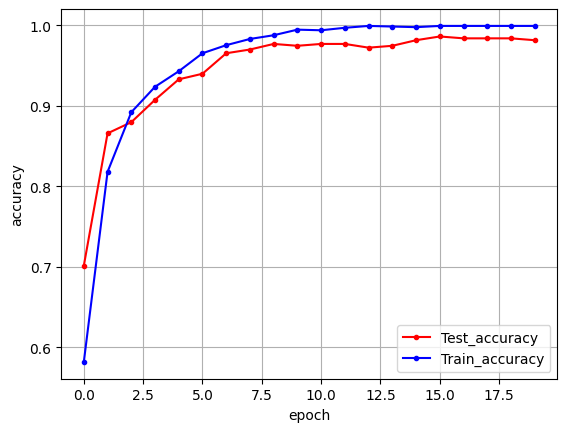

In [27]:
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, marker='.', c='red', label='Test_accuracy')
plt.plot(x_len, y_acc, marker='.', c='blue', label='Train_accuracy')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()